In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from scipy.special import expit

from tqdm import  tqdm_notebook as tqdm

import scipy.signal as signal

from PIL import ImageFilter
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline  

from skimage import morphology

from skimage import filters

from skimage.feature import corner_peaks
from skimage.feature import corner_shi_tomasi
from skimage.feature import corner_harris

import time

In [2]:
def load_image(filename):
    return Image.open(filename).convert('L').resize([255,255])


In [3]:
img = load_image('Picture/1.tif')

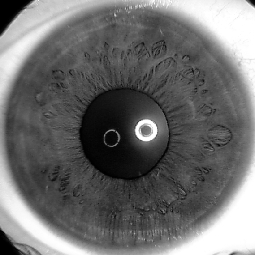

In [305]:
img

In [300]:
arr = mask/255*(np.array(img)/255).astype(np.float64)
arr = (filters.gaussian(arr/255.0, sigma=0.5)*255).astype(np.float64)
new_arr = 255*(arr>0.12)


new_arr = morphology.erosion(new_arr/255.0, selem = morphology.disk(1))*255.0
new_arr = (filters.sobel(new_arr/255.0)*255).astype(np.float64)

new_arr = 255*(arr>0.5)

new = Image.fromarray((new_arr).astype(np.uint8))

In [307]:
arr = (np.array(img)).astype(np.float64)

arr1 = (filters.gaussian(arr/255.0, sigma=2)*255).astype(np.float64)

arr2 = (filters.sobel(arr1/255.0)*255).astype(np.float64)

tr = filters.threshold_mean(arr2)
new_arr = 255*(arr2>tr)

new_arr = morphology.erosion(new_arr/255.0, selem = morphology.disk(4))*255.0

new = Image.fromarray((new_arr).astype(np.uint8))

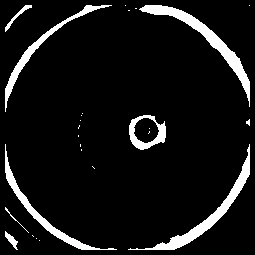

In [308]:
new

In [309]:
new.save('Picture/2_mask.jpg')